# Plotting Collaborator Characteristics by Seniority

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

In [2]:
# Reading paths
INDIR = "../../plot_data/4/"
# Path to where we will save our processed files
OUTDIR = "../../plots/"

In [3]:
def create_collaborator_char_plot(categories, retracted_data, non_retracted_data, p_data, color_dict, marker_dict, 
                                  xticks, foutname, create_legend=False, 
                                 letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']):
    # Generate some random data for demonstration

    #retracted_data = np.random.rand(3,3)  # Three categories with three pairs of data points each
    #non_retracted_data = np.random.rand(3, 3)

    # Set the significance threshold for connecting lines
    significance_threshold = 0.05

    # Create the figure with subplots
    fig, axs = plt.subplots(3, 3, figsize=(8, 5.5), sharey='row')
    fig.subplots_adjust(hspace=0.5)

    counter = 0
    
    colors = [color_dict.get(categories[0]),
            color_dict.get(categories[1]),
             color_dict.get(categories[2]),
             color_dict.get(categories[3]),]
    
    # Iterate over each subplot
    for i, ax in enumerate(axs.flat):
        category_index = i % 4  # Determine the category (0, 1, or 2)
        retracted_values = retracted_data[counter]
        non_retracted_values = non_retracted_data[counter]
        pval_values = p_data[counter]
    
        # Connect the dots with solid or dotted lines based on significance
        for j in range(len(retracted_values)):
            line_style = '-' if pval_values[j] < significance_threshold else ':'
            ax.plot([retracted_values[j], non_retracted_values[j]], [j + 1, j + 1], 'k', linestyle=line_style)
            
        # This is the code to go with.
        for x, y, color in zip(retracted_values, [1,2,3,4], colors):
            ax.plot(x, y, color=color, label='Retracted', marker='o')

        for x, y, color in zip(non_retracted_values, [1,2,3,4], colors):
            ax.plot(x, y, color=color, label='Non-retracted', marker='s')


        
        ax.set_xticks(xticks[counter])
        ax.set_xticklabels(xticks[counter])
        
        ax.set_yticks([1, 2, 3, 4])
        ax.set_yticklabels(categories)
        ax.set_ylim(-0.5, 5)
        ax.spines[['right', 'top']].set_visible(False)
        
        ax.invert_yaxis()
        
        ax.annotate(letters[i], xy=(0.05, 0.9), xycoords='axes fraction', fontsize=14, fontweight='bold')
        
        counter += 1
        
        # Labeling the x and y axis
        if(counter == 1):
            ax.set_ylabel('Collaborators\nRetained', labelpad=25, fontsize=12)
            ax.set_xlabel("Academic Age", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 2):
            ax.set_xlabel("Number of Papers", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
            
        elif(counter == 3):
            ax.set_xlabel("Number of Citations", labelpad=25, fontsize=12)
            ax.xaxis.set_label_position("top")
        
        elif(counter == 4):
            ax.set_ylabel('Collaborators\nGained', labelpad=25, fontsize=12)
            
        elif(counter == 7):
            ax.set_ylabel('Difference-in-\nDifference', labelpad=25, fontsize=12)

    if(create_legend):
        # Create a custom legend
        # Let us add items to the legend 
        legend_elements = []
        for key in color_dict.keys():
            colori = color_dict.get(key)
            markeri = marker_dict.get(key)

            elementi = None
        
            if key == "Retracted":
            # Create an empty circle as a marker
                elementi = plt.Line2D([0], [1], marker='o', color=colori, markerfacecolor='none', 
                                      markersize=8, label=key, linestyle='', fillstyle='none')
                legend_elements.append(elementi)
            elif key == "Non-retracted":
            # Create an empty square as a marker
                elementi = plt.Line2D([0], [1], marker='s', color=colori, markerfacecolor='none', 
                                  markersize=8, label=key, linestyle='', fillstyle='none')
                legend_elements.append(elementi)

        legend = fig.legend(handles=legend_elements, loc='upper center', ncol=len(legend_elements), prop={'size': 11},
                  frameon=False)
        legend.set_bbox_to_anchor((0.5, 0.98))
    
    rect = Rectangle((0, 0), 1, 0.90, transform=fig.transFigure, fill=False, edgecolor='black')

    fig.patches.append(rect)

    # Adjust the layout to accommodate the legend
    plt.tight_layout(rect=[0, 0, 1, 0.90])
    #plt.tight_layout()
    
    plt.savefig(foutname, format='pdf')
    # Show the plot
    #plt.show()


# Plotting Collaborator Characteristics by Reason

In [4]:
def read_dict(fname):
    import pickle
    
    with open(fname, 'rb') as f:
        loaded_dict = pickle.load(f)
        return loaded_dict

    
dict_forAge = read_dict(INDIR+"/collaborator_chars_byAge_firstlastauthors.pkl")
dict_forReason = read_dict(INDIR+"/collaborator_chars_byReason_firstlastauthors.pkl")

# Let us now create retracted means, and retracted pvals, and non-retracted means, and non-retracted pvals
# We will do so for both stratified by age, and stratified by reason


def create_lists_for_plots(dicto, categories=['Junior','Mid','Senior'], 
                                    scientistType='retracted',
                                    statistic="mean"):
    expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
    expFields2 = ['AcademicAge', 'MAGCumPapers', 'MAGCumCitations']
    outcomeTypes = ['Retention', 'Gain', 'DiD']
    lstOflst = []
    
    for outcomeType in outcomeTypes:
        for i in range(len(expFields)):
            field1 = expFields[i]
            field2 = expFields2[i]
            lst_i = []
            # going through senior junior and mid-career
            for category in categories:
                statistic_key = ''
                if outcomeType in ['Retention', 'Gain']:
                    statistic_key = 'Collab' + field2 + "AtCollaboration_" + scientistType + "_" + statistic

                elif outcomeType in ['DiD']:
                    statistic_key = 'Diff' + field2 + "AtRetraction_" + scientistType + "_" + statistic

                val = dicto.get(outcomeType).get(field1).get(category).get(statistic_key)
                
                print(field1, field2, outcomeType, scientistType, category, val)
                
                lst_i.append(val)
            lstOflst.append(lst_i)

    return lstOflst



In [5]:
dict_forReason

{'Retention': {'Academic Age': {'Overall': {'CollabAcademicAgeAtCollaboration_retracted_mean': 13.84,
    'CollabAcademicAgeAtCollaboration_retracted_median': 14.24,
    'CollabAcademicAgeAtCollaboration_retracted_std': 7.26,
    'CollabAcademicAgeAtCollaboration_nonretracted_mean': 15.52,
    'CollabAcademicAgeAtCollaboration_nonretracted_median': 14.31,
    'CollabAcademicAgeAtCollaboration_nonretracted_std': 7.38,
    'CollabAcademicAgeAtCollaboration_delta_mean': -1.68,
    'CollabAcademicAgeAtCollaboration_pval_welch': 0.001,
    'CollabAcademicAgeAtCollaboration_CI_95lower': -2.58,
    'CollabAcademicAgeAtCollaboration_CI_95upper': -0.79},
   'Misconduct': {'CollabAcademicAgeAtCollaboration_retracted_mean': 12.92,
    'CollabAcademicAgeAtCollaboration_retracted_median': 13.86,
    'CollabAcademicAgeAtCollaboration_retracted_std': 7.12,
    'CollabAcademicAgeAtCollaboration_nonretracted_mean': 14.89,
    'CollabAcademicAgeAtCollaboration_nonretracted_median': 13.36,
    'CollabAca

In [6]:
def create_pval_lists_for_plots(dicto, categories=['Overall','Junior','Mid','Senior'], 
                                    statistic="pval_welch"):
    
    expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
    expFields2 = ['AcademicAge', 'MAGCumPapers', 'MAGCumCitations']
    outcomeTypes = ['Retention', 'Gain', 'DiD']
    lstOflst = []
    
    for outcomeType in outcomeTypes:
        for i in range(len(expFields)):
            field1 = expFields[i]
            field2 = expFields2[i]
            lst_i = []
            # going through senior junior and mid-career
            for category in categories:
                statistic_key = ''
                if outcomeType in ['Retention', 'Gain']:
                    statistic_key = 'Collab' + field2 + "AtCollaboration_"  + statistic

                elif outcomeType in ['DiD']:
                    statistic_key = 'Diff' + field2 + "AtRetraction_" + statistic

                val = dicto.get(outcomeType).get(field1).get(category).get(statistic_key)
                
                print(field1, field2, outcomeType, category, val)
                
                lst_i.append(val)
            lstOflst.append(lst_i)

    return lstOflst

In [7]:
retracted_means_age = create_lists_for_plots(dict_forAge, categories=['Overall','Junior','Mid','Senior'], 
                                    scientistType='retracted',
                                    statistic="mean")

nonretracted_means_age = create_lists_for_plots(dict_forAge, categories=['Overall','Junior','Mid','Senior'], 
                                    scientistType='nonretracted',
                                    statistic="mean")

Academic Age AcademicAge Retention retracted Overall 13.84
Academic Age AcademicAge Retention retracted Junior 12.61
Academic Age AcademicAge Retention retracted Mid 14.63
Academic Age AcademicAge Retention retracted Senior 14.7
Number of Papers MAGCumPapers Retention retracted Overall 67.49
Number of Papers MAGCumPapers Retention retracted Junior 68.22
Number of Papers MAGCumPapers Retention retracted Mid 76.44
Number of Papers MAGCumPapers Retention retracted Senior 61.64
Number of Citations MAGCumCitations Retention retracted Overall 1476.92
Number of Citations MAGCumCitations Retention retracted Junior 1375.15
Number of Citations MAGCumCitations Retention retracted Mid 1451.05
Number of Citations MAGCumCitations Retention retracted Senior 1600.02
Academic Age AcademicAge Gain retracted Overall 7.75
Academic Age AcademicAge Gain retracted Junior 7.07
Academic Age AcademicAge Gain retracted Mid 8.15
Academic Age AcademicAge Gain retracted Senior 8.26
Number of Papers MAGCumPapers Gai

In [8]:
retracted_pvals_age = create_pval_lists_for_plots(dict_forAge, categories=['Overall','Junior','Mid','Senior'],
                                    statistic="pval_welch")

Academic Age AcademicAge Retention Overall 0.001
Academic Age AcademicAge Retention Junior 0.026
Academic Age AcademicAge Retention Mid 0.232
Academic Age AcademicAge Retention Senior 0.038
Number of Papers MAGCumPapers Retention Overall 0.242
Number of Papers MAGCumPapers Retention Junior 0.298
Number of Papers MAGCumPapers Retention Mid 0.819
Number of Papers MAGCumPapers Retention Senior 0.582
Number of Citations MAGCumCitations Retention Overall 0.607
Number of Citations MAGCumCitations Retention Junior 0.943
Number of Citations MAGCumCitations Retention Mid 0.822
Number of Citations MAGCumCitations Retention Senior 0.517
Academic Age AcademicAge Gain Overall 0.5
Academic Age AcademicAge Gain Junior 0.355
Academic Age AcademicAge Gain Mid 0.63
Academic Age AcademicAge Gain Senior 0.712
Number of Papers MAGCumPapers Gain Overall 0.645
Number of Papers MAGCumPapers Gain Junior 0.583
Number of Papers MAGCumPapers Gain Mid 0.066
Number of Papers MAGCumPapers Gain Senior 0.902
Number of

In [9]:
expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
outcomeTypes = ['Retention', 'Gain', 'DiD']
categories = ['Overall','Early-Career', 'Mid-Career', 'Senior']


combos = []

for e in expFields:
    for o in outcomeTypes:
        for c in categories:
            combos.append(e+","+o+","+c)


counter = 0
            
for i in range(len(retracted_pvals_age)):
    for j in range(len(retracted_pvals_age[i])):
        
        combo_i = combos[counter]
        counter += 1
        
        retracted_mean = retracted_means_age[i][j]
        nonretracted_mean = nonretracted_means_age[i][j]
        
        retracted_pval = retracted_pvals_age[i][j]
        
        printString = ""
        
        if(retracted_pval < 0.05):
            if(retracted_mean < nonretracted_mean):
                printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "***," + str(retracted_pval)
            else:
                printString = combo_i + "," + str(retracted_mean) + "***," + str(nonretracted_mean) + "," + str(retracted_pval)
            
        else:
            printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "," + str(retracted_pval)
        
        print(printString)
        

Academic Age,Retention,Overall,13.84,15.52***,0.001
Academic Age,Retention,Early-Career,12.61,14.48***,0.026
Academic Age,Retention,Mid-Career,14.63,15.86,0.232
Academic Age,Retention,Senior,14.7,16.44***,0.038
Academic Age,Gain,Overall,67.49,74.43,0.242
Academic Age,Gain,Early-Career,68.22,80.12,0.298
Academic Age,Gain,Mid-Career,76.44,78.95,0.819
Academic Age,Gain,Senior,61.64,65.82,0.582
Academic Age,DiD,Overall,1476.92,1350.49,0.607
Academic Age,DiD,Early-Career,1375.15,1356.35,0.943
Academic Age,DiD,Mid-Career,1451.05,1530.51,0.822
Academic Age,DiD,Senior,1600.02,1242.4,0.517
Number of Papers,Retention,Overall,7.75,8.01,0.5
Number of Papers,Retention,Early-Career,7.07,7.73,0.355
Number of Papers,Retention,Mid-Career,8.15,7.81,0.63
Number of Papers,Retention,Senior,8.26,8.47,0.712
Number of Papers,Gain,Overall,36.0,34.93,0.645
Number of Papers,Gain,Early-Career,34.08,36.42,0.583
Number of Papers,Gain,Mid-Career,40.45,32.42,0.066
Number of Papers,Gain,Senior,35.27,34.86,0.902
Number

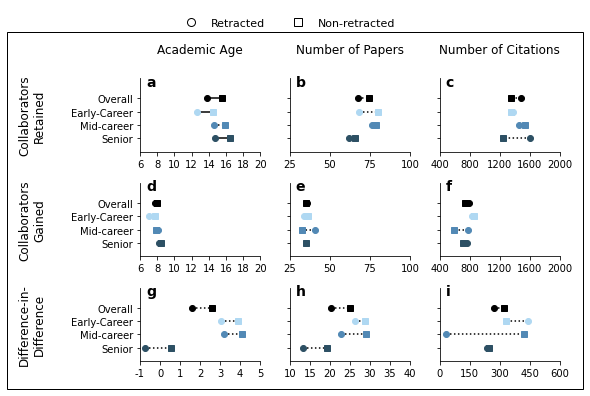

In [10]:
categories = ['Overall','Early-Career', 'Mid-career', 'Senior']

color_dict = {'Overall':'black',
            'Early-Career':'#AFD8F2',
             'Mid-career':'#5289B5',
             'Senior': '#2D5064',
             'Retracted': 'black',
             'Non-retracted':'black'}

marker_dict = {'Retracted':'o',
             'Non-retracted':'s',
             'Overall':'o',
             'Early-Career': 'o',
             'Senior': 'o',
              'Mid-career':'o'}

xticks = [[6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [-1,0,1,2,3,4,5],
         [10,15,20,25,30,35,40],
         [0,150,300,450,600]]

create_collaborator_char_plot(categories, retracted_means_age, 
                              nonretracted_means_age, retracted_pvals_age, 
                              color_dict, marker_dict, xticks, 
                              foutname = OUTDIR+"/collaborator_quality_bySeniority_firstlastauthors_new.pdf",
                              create_legend=True)


In [11]:
retracted_means_age

[[13.84, 12.61, 14.63, 14.7],
 [67.49, 68.22, 76.44, 61.64],
 [1476.92, 1375.15, 1451.05, 1600.02],
 [7.75, 7.07, 8.15, 8.26],
 [36.0, 34.08, 40.45, 35.27],
 [791.79, 826.74, 779.37, 759.34],
 [1.58, 3.05, 3.19, -0.73],
 [20.33, 26.23, 22.86, 13.25],
 [269.48, 439.08, 33.32, 238.65]]

In [12]:
retracted_means_reason = create_lists_for_plots(dict_forReason, categories=['Overall','Misconduct','Plagiarism','Mistake'], 
                                    scientistType='retracted',
                                    statistic="mean")

nonretracted_means_reason = create_lists_for_plots(dict_forReason, categories=['Overall','Misconduct','Plagiarism','Mistake'], 
                                    scientistType='nonretracted',
                                    statistic="mean")

retracted_pvals_reason = create_pval_lists_for_plots(dict_forReason, categories=['Overall','Misconduct','Plagiarism','Mistake'],
                                    statistic="pval_welch")

Academic Age AcademicAge Retention retracted Overall 13.84
Academic Age AcademicAge Retention retracted Misconduct 12.92
Academic Age AcademicAge Retention retracted Plagiarism 12.99
Academic Age AcademicAge Retention retracted Mistake 15.12
Number of Papers MAGCumPapers Retention retracted Overall 67.49
Number of Papers MAGCumPapers Retention retracted Misconduct 69.8
Number of Papers MAGCumPapers Retention retracted Plagiarism 67.6
Number of Papers MAGCumPapers Retention retracted Mistake 69.95
Number of Citations MAGCumCitations Retention retracted Overall 1476.92
Number of Citations MAGCumCitations Retention retracted Misconduct 1498.48
Number of Citations MAGCumCitations Retention retracted Plagiarism 1610.28
Number of Citations MAGCumCitations Retention retracted Mistake 1488.08
Academic Age AcademicAge Gain retracted Overall 7.75
Academic Age AcademicAge Gain retracted Misconduct 7.27
Academic Age AcademicAge Gain retracted Plagiarism 6.52
Academic Age AcademicAge Gain retracted

In [13]:
expFields = ['Academic Age', 'Number of Papers', 'Number of Citations']
outcomeTypes = ['Retention', 'Gain', 'DiD']
categories = ['Overall','Misconduct','Plagiarism','Mistake']


combos = []

for e in expFields:
    for o in outcomeTypes:
        for c in categories:
            combos.append(e+","+o+","+c)


counter = 0
            
for i in range(len(retracted_pvals_reason)):
    for j in range(len(retracted_pvals_reason[i])):
        
        combo_i = combos[counter]
        counter += 1
        
        retracted_mean = retracted_means_reason[i][j]
        nonretracted_mean = nonretracted_means_reason[i][j]
        
        retracted_pval = retracted_pvals_reason[i][j]
        
        printString = ""
        
        if(retracted_pval < 0.05):
            if(retracted_mean < nonretracted_mean):
                printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "***," + str(retracted_pval)
            else:
                printString = combo_i + "," + str(retracted_mean) + "***," + str(nonretracted_mean) + "," + str(retracted_pval)
            
        else:
            printString = combo_i + "," + str(retracted_mean) + "," + str(nonretracted_mean) + "," + str(retracted_pval)
        
        print(printString)

Academic Age,Retention,Overall,13.84,15.52***,0.001
Academic Age,Retention,Misconduct,12.92,14.89,0.118
Academic Age,Retention,Plagiarism,12.99,15.42***,0.016
Academic Age,Retention,Mistake,15.12,16.17,0.268
Academic Age,Gain,Overall,67.49,74.43,0.242
Academic Age,Gain,Misconduct,69.8,94.19,0.334
Academic Age,Gain,Plagiarism,67.6,66.42,0.901
Academic Age,Gain,Mistake,69.95,76.97,0.427
Academic Age,DiD,Overall,1476.92,1350.49,0.607
Academic Age,DiD,Misconduct,1498.48,1701.81,0.66
Academic Age,DiD,Plagiarism,1610.28,1009.21,0.37
Academic Age,DiD,Mistake,1488.08,1686.58,0.509
Number of Papers,Retention,Overall,7.75,8.01,0.5
Number of Papers,Retention,Misconduct,7.27,7.79,0.569
Number of Papers,Retention,Plagiarism,6.52,7.88***,0.038
Number of Papers,Retention,Mistake,9.39,8.47,0.162
Number of Papers,Gain,Overall,36.0,34.93,0.645
Number of Papers,Gain,Misconduct,40.26,35.66,0.423
Number of Papers,Gain,Plagiarism,29.92,32.26,0.525
Number of Papers,Gain,Mistake,43.66,39.0,0.312
Number of Pap

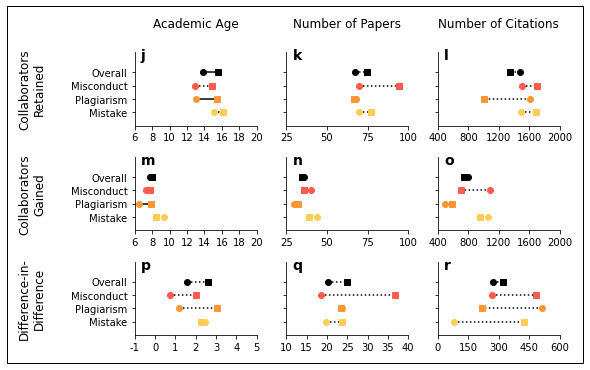

In [14]:
categories = ['Overall','Misconduct', 'Plagiarism', 'Mistake']

color_dict = {'Misconduct':'#7B2869',
             'Plagiarism':'#C85C8E',
             'Mistake': '#FFBABA',
             'Retracted': 'black',
             'Non-retracted':'black'}

color_dict = {'Overall':'black',
             'Misconduct':'#FF5C4D',
             'Plagiarism':'#FF9636',
             'Mistake': '#FFCD58',
             'Retracted': 'black',
             'Non-retracted':'black'}

marker_dict = {'Retracted':'o',
             'Non-retracted':'s',
             'Overall':'o',
             'Misconduct': 'o',
             'Plagiarism': 'o',
              'Mistake':'o'}

# Harmonizing on Kinga's request
xticks = [[6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [6,8,10,12,14,16,18,20],
         [25,50,75,100],
         [400,800,1200,1600,2000],
         [-1,0,1,2,3,4,5],
         [10,15,20,25,30,35,40],
         [0,150,300,450,600]]

create_collaborator_char_plot(categories, retracted_means_reason, 
                              nonretracted_means_reason, retracted_pvals_reason, 
                              color_dict, marker_dict, xticks, 
                              foutname = OUTDIR+"/collaborator_quality_byReason_firstlastauthors_new.pdf",
                              create_legend=False,
                             letters = ['j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r'])